In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
stormevents = pd.read_csv("../data/StormEvents_details-ftp_v1.0_d1950_c20250520.csv")

In [65]:
stormevents2013 = pd.read_csv("../data/StormEvents_details-ftp_v1.0_d2013_c20250520.csv")

In [51]:
print(stormevents.shape)
print(stormevents.columns)
#print(stormevents['EPISODE_NARRATIVE'].isna().all())
#print(stormevents['EPISODE_NARRATIVE'].value_counts())
#stormevents['EVENT_TYPE'].head(20)
stormevents['DAMAGE_PROPERTY'].head(20)
stormevents['DAMAGE_PROPERTY'].describe()
stormevents['DAMAGE_PROPERTY'].value_counts()


(223, 51)
Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')


DAMAGE_PROPERTY
25K     75
250K    60
2.5K    42
0K      28
2.5M     7
.25K     6
.03K     5
Name: count, dtype: int64

In [ ]:
def convert_to_number(x):
    if 'K' in x:
        return float(x.replace('K', '')) * 1000
    elif 'M' in x:
        return float(x.replace('M', '')) * 1000000
    else:
        return(float(x))
    return x


In [54]:
stormevents['DAMAGE_PROPERTY'] = stormevents['DAMAGE_PROPERTY'].apply(convert_to_number)

In [46]:
stormevents['DAMAGE_PROPERTY'].head(20)
stormevents['DAMAGE_PROPERTY'].describe()
stormevents['DAMAGE_PROPERTY'].value_counts()

DAMAGE_PROPERTY
25000.0      75
250000.0     60
2500.0       42
0.0          28
2500000.0     7
250.0         6
30.0          5
Name: count, dtype: int64

In [57]:
stormevents['DAMAGE_CROPS'].describe()

count    223.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: DAMAGE_CROPS, dtype: float64

In [63]:
print(stormevents['EVENT_NARRATIVE'].isna().all())

True


(array([81., 75.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 60.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.]),
 array([      0.,   25000.,   50000.,   75000.,  100000.,  125000.,
         150000.,  175000.,  200000.,  225000.,  250000.,  275000.,
         300000.,  325000.,  350000.,  375000.,  400000.,  425000.,
         450000.,  475000.,  500000.,  525000.,  550000.,  575000.,
         600000.,  625000.,  650000.,  675000.,  700000.,  725000.,
         750000.,  775000.,  800000.,  825000.,  850000.,  875000.,
         900000.,  925000.

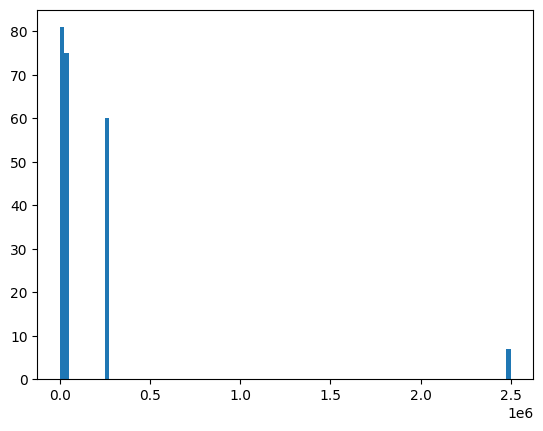

In [ ]:
#plt.hist(stormevents['DAMAGE_PROPERTY'], bins = 100)

In [83]:
print(stormevents2013['EVENT_NARRATIVE'].isna().value_counts())
stormevents2013.shape
stormevents2013.select_dtypes(include=['object']).columns
#print(stormevents.columns)
#stormevents2013['DAMAGE_PROPERTY'].describe()


EVENT_NARRATIVE
False    44492
True     15494
Name: count, dtype: int64


Index(['STATE', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_NAME', 'WFO',
       'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'DAMAGE_PROPERTY',
       'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE',
       'TOR_F_SCALE', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_NAME', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_AZIMUTH',
       'END_LOCATION', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [96]:
print(stormevents2013['CATEGORY'][stormevents2013['CATEGORY'].isna()==False])
print(stormevents2013['TOR_OTHER_CZ_NAME'][stormevents2013['TOR_OTHER_CZ_NAME'].isna()==False])

stormevents2013['DATA_SOURCE'].value_counts()

12884    5.0
15573    1.0
Name: CATEGORY, dtype: float64
232               UNION
704          COLUMBIANA
4081     EAST FELICIANA
5019               POLK
5403            DE SOTO
              ...      
59690         KOSCIUSKO
59774            PUTNAM
59775          PAULDING
59782            WABASH
59949        PALM BEACH
Name: TOR_OTHER_CZ_NAME, Length: 143, dtype: object


DATA_SOURCE
CSV    59986
Name: count, dtype: int64